# IRISpy Spectrograph Tutorial

In this notebook we explore some of the basic functionality of the IRISSpectrograph object.

In [2]:
import os.path
import datetime

import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u

from ndcube import NDCube

from irispy.spectrograph import IRISSpectrograph


from sunpycube.cube.datacube import Cube, CubeSequence
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from irispy.data import sample
from IPython.display import HTML
print(sample.RASTER)
%matplotlib notebook

plt.rcParams.update({'figure.dpi': 100,'font.size':10})

/Users/shelbe/sunpy/data/sample_data/iris_l2_20170502_095734_3620250135_raster_t000_r00000.fits


## Instantiate an IRISSpectrograph Object from FITS Files

In [1]:
file_path = '/Users/shelbe/sunpy/raster/'
files = [os.path.join(file_path, f) for f in os.listdir(file_path)]

NameError: name 'os' is not defined

In [4]:
sg=IRISSpectrograph(files)

The repr string of IRISSpectrograph gives a usefule summary of the OBS, spectral windows and data shape.

In [5]:
sg

<iris.IRISSpectrograph instance
OBS ID: 3620250135
OBS Description: Medium dense 16-step raster 5x60 16s  C II   Si IV   Mg II h/k   Mg
OBS period: 2017-05-02T09:57:34.760 -- 2017-05-02T11:08:14.150
Instance period: 2017-05-02 09:57:34.930000 -- 2017-05-02 09:58:08.120000
Number unique raster positions: 16
Spectral windows
    C II 1336
        (raster axis, slit axis, spectral axis) (('HPLN-TAN', 'HPLT-TAN', 'WAVE'),)
    Fe XII 1349
        (raster axis, slit axis, spectral axis) (('HPLN-TAN', 'HPLT-TAN', 'WAVE'),)
    O I 1356
        (raster axis, slit axis, spectral axis) (('HPLN-TAN', 'HPLT-TAN', 'WAVE'),)
    Si IV 1394
        (raster axis, slit axis, spectral axis) (('HPLN-TAN', 'HPLT-TAN', 'WAVE'),)
    Si IV 1403
        (raster axis, slit axis, spectral axis) (('HPLN-TAN', 'HPLT-TAN', 'WAVE'),)
    2832
        (raster axis, slit axis, spectral axis) (('HPLN-TAN', 'HPLT-TAN', 'WAVE'),)
    2814
        (raster axis, slit axis, spectral axis) (('HPLN-TAN', 'HPLT-TAN', 'WAVE'

### Inspecting an IRISSpectrograph Instance
Infomation on the spectral windows in the instance is stored as an astropy table. This can be indexed by row and column as with any astropy table. And where appropriate, units are attached to columns.

In [6]:
sg.spectral_windows

name,detector type,brightest wavelength,min wavelength,max wavelength
,,Angstrom,Angstrom,Angstrom
str12,str4,float64,float64,float64
C II 1336,FUV1,1335.70996094,1332.75413016,1337.4528902
Fe XII 1349,FUV1,1349.43005371,1347.73305029,1350.74441032
O I 1356,FUV1,1355.59997559,1352.30201033,1356.53349037
Si IV 1394,FUV2,1393.7800293,1390.94806787,1395.95974787
Si IV 1403,FUV2,1402.77001953,1398.68182787,1406.11030787
2832,NUV,2832.89291545,2831.58172549,2834.20410541
2814,NUV,2814.61263601,2812.89408606,2816.33118595
Mg II k 2796,NUV,2796.19995117,2793.31534666,2806.55454625


The data is stored as a dictionary, where each spectral window has its own key.

In [7]:
sg.data

{'2814': SpectrogramSequence
 ---------------------
 Rasters:  120
 Exposures per Raster: 16
 Axis Types: ('HPLN-TAN', 'HPLT-TAN', 'WAVE')
 Sequence Shape: (1920, <Quantity 400.0 pix>, <Quantity 136.0 pix>)
 , '2832': SpectrogramSequence
 ---------------------
 Rasters:  120
 Exposures per Raster: 16
 Axis Types: ('HPLN-TAN', 'HPLT-TAN', 'WAVE')
 Sequence Shape: (1920, <Quantity 400.0 pix>, <Quantity 104.0 pix>)
 , 'C II 1336': SpectrogramSequence
 ---------------------
 Rasters:  120
 Exposures per Raster: 16
 Axis Types: ('HPLN-TAN', 'HPLT-TAN', 'WAVE')
 Sequence Shape: (1920, <Quantity 400.0 pix>, <Quantity 182.0 pix>)
 , 'Fe XII 1349': SpectrogramSequence
 ---------------------
 Rasters:  120
 Exposures per Raster: 16
 Axis Types: ('HPLN-TAN', 'HPLT-TAN', 'WAVE')
 Sequence Shape: (1920, <Quantity 400.0 pix>, <Quantity 117.0 pix>)
 , 'Mg II k 2796': SpectrogramSequence
 ---------------------
 Rasters:  120
 Exposures per Raster: 16
 Axis Types: ('HPLN-TAN', 'HPLT-TAN', 'WAVE')
 Sequ

# Inspecting Data for One Spectral Window
The data for each spectral window is stored in a SpectrogramSequence object.

In [8]:
sg.data["C II 1336"]

SpectrogramSequence
---------------------
Rasters:  120
Exposures per Raster: 16
Axis Types: ('HPLN-TAN', 'HPLT-TAN', 'WAVE')
Sequence Shape: (1920, <Quantity 400.0 pix>, <Quantity 182.0 pix>)


Inspect the dimensions of the SpectrumSequence instance using the dimensions attribute. This returns a SequenceDimensionPair object which gives the shape of the data as indexed, and the types of WCS axes corresponding to each axis.
The first dimension corresponds to the exposure number. This has both a translation to time and solar X. The second dimension is position along the slit. The third dimension wavelength.

In [9]:
sg.data["C II 1336"].dimensions

SequenceDimensionPair(shape=(1920, <Quantity 400.0 pix>, <Quantity 182.0 pix>), axis_types=('HPLN-TAN', 'HPLT-TAN', 'WAVE'))

We can produce a quicklook animation of the SpectrogramSequence by using the plot attribute. Use the left and right arrow keys to scroll back and forth through frames in time or click the play/pause icon next to the slider.

<IPython.core.display.Javascript object>


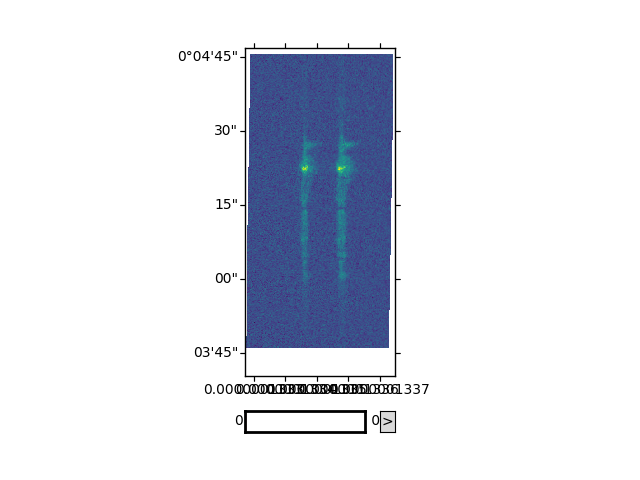

In [10]:
%matplotlib notebook
sg.data["C II 1336"].plot()

## Indexing/Slicing Data for One Spectral Window

### Slice by Exposure number (Default)
By default we index the SpectrogramSequence as though it has three dimensions: exposure number, position along slit, and wavelength. (In accordance with the dimensions attribute.) Let us slice by the 3rd exposure, 120th to 170th pixels along slit, and the 75th to 175 wavelength pixels.
This will return a spectrogram which is represented as an NDCube object.

In [11]:
sg.data["C II 1336"][3, 120:170, 75:175]

Sunpy NDCube
---------------------
WCS Keywords

Number of WCS axes: 3
CTYPE : 'WAVE'  'HPLT-TAN'  'HPLN-TAN'  
CRVAL : 1.33275413016e-07  0.070423888888888897  -0.04885833333333333  
CRPIX : -74.0  80.5  5.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  0.99993872642500004  -0.0236807777419  
PC3_1 PC3_2 PC3_3  : 0.0  0.0053738806049599998  0.99993872642500004  
CDELT : 2.5960000231900002e-12  4.6208333333333329e-05  9.7000572416388892e-05  
NAXIS : 100  50  1
---------------------
Length of NDCube: [  50.  100.] pix
Axis Types of NDCube: ['HPLT-TAN', 'WAVE']

We can produce a quicklook of this data by again using the plot attribute. However, because the slice we are plotting is 2D, the plot attribute will return a 2D plot rather than an animation.

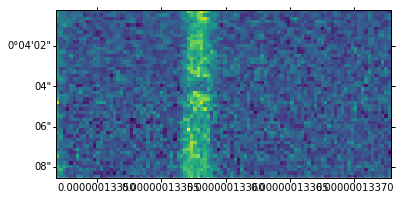

In [19]:
%matplotlib inline
sg.data["C II 1336"][3, 120:170, 75:175].plot()

**N.B.** It is important to slice the SpectrogramSequence or NDCube objects as above rather than finding the numpy array stored within and slicing that manually. By slicing the whole object, not only is the data sliced, but other associated data like the WCS translations, data mask, uncertainty array etc. are sliced correspondingly and kept consistent. Digging into the object, pulling data out and then slicing it, may either break or render inaccurate a lot of the functionality associated with these objects. See Section "More on NDCube" to learn more about these associated data.

## Slice by Raster
If we prefer, we can also slice by raster scan number and raster position, instead of just exposure number. This means we are slicing the data in a pseudo-4D fashion: raster scan number raster position, position along slit, wavelength.
To do this, we slice/index the index_by_raster attribute rather than the object. Let us get the same region as above but indexing by raster. There are 8 positions in each raster in this OBS. So the third exposure corresponds to the 0th raster scan and the third raster position within that scan.

In [13]:
sg.data["C II 1336"].index_by_raster[0, 3, 120:170, 75:175]

Sunpy NDCube
---------------------
WCS Keywords

Number of WCS axes: 3
CTYPE : 'WAVE'  'HPLT-TAN'  'HPLN-TAN'  
CRVAL : 1.33275413016e-07  0.070423888888888897  -0.04885833333333333  
CRPIX : -74.0  80.5  5.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  0.99993872642500004  -0.0236807777419  
PC3_1 PC3_2 PC3_3  : 0.0  0.0053738806049599998  0.99993872642500004  
CDELT : 2.5960000231900002e-12  4.6208333333333329e-05  9.7000572416388892e-05  
NAXIS : 100  50  1
---------------------
Length of NDCube: [  50.  100.] pix
Axis Types of NDCube: ['HPLT-TAN', 'WAVE']

This has returned the same NDCube as before.  We can confirm this by plotting it as before

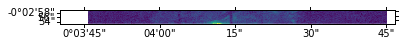

In [57]:
sg.data["C II 1336"].index_by_raster[0, :, :, 120].plot()

## Extra Coordinates
Although the exposure number/raster position axis corresponds to helioprojected longitude in the WCS object, it also corresponds to time. The extra coordinate systems associated with this axis are provided in a dictionary labeled exposure_axis_extra_coords.

In [21]:
sg.data["C II 1336"].exposure_axis_extra_coords

{'raster position': array([ 0,  1,  2, ..., 13, 14, 15]),
 'time': array([datetime.datetime(2017, 5, 2, 9, 57, 34, 930000),
        datetime.datetime(2017, 5, 2, 9, 57, 37, 190000),
        datetime.datetime(2017, 5, 2, 9, 57, 39, 370000), ...,
        datetime.datetime(2017, 5, 2, 11, 8, 7, 720000),
        datetime.datetime(2017, 5, 2, 11, 8, 9, 900000),
        datetime.datetime(2017, 5, 2, 11, 8, 11, 980000)], dtype=object)}

## More on NDCube

```NDCube``` is the fundamental data object used in ```IRISSpectrograph```.  It holds an N-D data array and WCS object that holds the translations from pixel to real world coordinates.  It is subclassed from astropy NDData.  So it has the additional options to store a data mask, an uncertainty array giving the uncertainty of each value in the data array, etc.

**N.B.**: It is for this reason that it is important to interact/slice with ```NDCube``` objects as a whole.  It is highly discouraged to pull out the numpy data arrays and slice them if you want to use any of the functionality of NDCube afterwards.

**For the Interested Reader**: The relationship between ```NDCube``` and ```IRISSpectrograph``` is as follows:
* Spectrograms or cubes of spectrograms, one for each raster or sit-and-stare, are held in ```NDCube```s.
* ```NDCube```s are held within ```NDCubeSequence``` objects.  An NDCubeSequence is a list of ```NDCube```s with quicklook plotting, comprehensive slicing/indexing, and some convenience functions.  As an aside, as with ```NDCube```, it is important to slice/index an ```NDCubeSequence``` object as a whole, rather than trying to pull out the list of ```NDCube```s and slicing that manually.
* Data from a single spectral window is stored in ```SpectrogramSequence``` objects which are subclassed from ```NDCubeSequence```.  ```SpectrogramSequence``` is specific to spectrogram data and so can make some assumptions about the nature of the data, allowing it to be better tailored than ```NDCubeSequence```.  As above, it is important to slice/index the ```SpectrogramSequence``` object as a whole.  It is discouraged to pull out the data and slice that manually.
* ```SpectrogramSequence```s for all the spectral windows are stored as a dictionary in the ```IRISSpectrograph.data``` attribute.

### Create an NDCube object independently

In [60]:
hdulist = fits.open(os.path.join(file_path, files[0]))
data = hdulist[1].data
wcs_ = WCS(hdulist[1].header)
ndc = NDCube(data, wcs=wcs_)
hdulist.close()

### NDCube plotting
The NDCube.plot attribute provides the plotting functionality for both itself and other objects including NDCubeSequence, SpectrogramSequence, and hence IRISSpectrograph. It is a powerful quicklook functionality because with one API, it will provide an animation if the data is >2D with a slider for each additional dimension over 2D, an image if the data is 2D, and a line plot if the data is 1D. And because slicing an NDCube returns a new NDCube, plot can be called on slices of an NDCube.

In [61]:
# 3D data
ndc.dimensions

DimensionPair(shape=<Quantity [  16., 400., 182.] pix>, axis_types=['HPLN-TAN', 'HPLT-TAN', 'WAVE'])

<IPython.core.display.Javascript object>


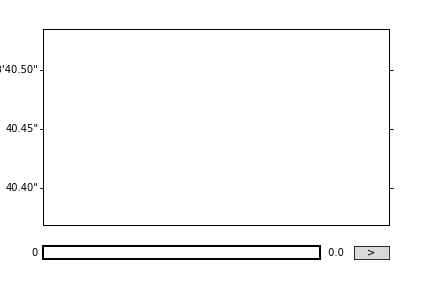

<IPython.core.display.Javascript object>


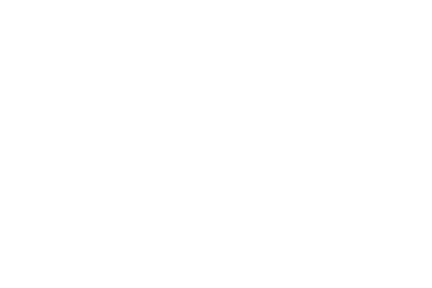

In [73]:
# Create animation of 3D cube
%matplotlib notebook
ndc.plot()

In [63]:
# 2D data
ndc[:,:,0].dimensions

DimensionPair(shape=<Quantity [  16., 400.] pix>, axis_types=['HPLN-TAN', 'HPLT-TAN'])

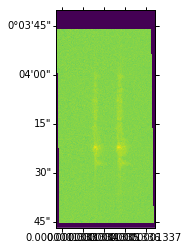

In [67]:
# Create image of 2D cube
%matplotlib inline

ndc[0,:,:].plot()

In [87]:
# 1D data
ndc[0, 100].dimensions

DimensionPair(shape=<Quantity [ 182.] pix>, axis_types=['WAVE'])

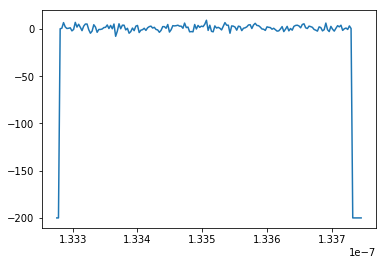

In [88]:
# Create plot of 1D cube
ndc[0, 100].plot()

## WCS conversions
NDCube subclasses the astropy WCS object which holds and implements the translations from pixel to real world coordinates. These translations are defined by standarized keywords that are set in the IRIS FITS files headers. The WCS object of the NDCube can be accessed directly.

In [59]:
ndc.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'WAVE'  'HPLT-TAN'  'HPLN-TAN'  
CRVAL : 1.33275413016e-07  0.070423888888888897  -0.04885833333333333  
CRPIX : 1.0  200.5  8.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  0.99993872642500004  -0.0236807777419  
PC3_1 PC3_2 PC3_3  : 0.0  0.0053738806049599998  0.99993872642500004  
CDELT : 2.5960000231900002e-12  4.6208333333333329e-05  9.7000572416388892e-05  
NAXIS : 182  400  16

**N.B.** Due to convention, WCS axes are given in reverse order to the data. This can be confusing, but don't try to "correct" the order. Functionalities throughout astropy and in NDCube are written expecting this reversed order. It will be less confusing the remember that the WCS object is reversed than trying to "fix" it. Also note that everywhere else in NDCube, the axes order is presented in data order e.g. NDCube.dimensions["axis_types"]

In [60]:
ndc.dimensions

DimensionPair(shape=<Quantity [  16., 400., 182.] pix>, axis_types=['HPLN-TAN', 'HPLT-TAN', 'WAVE'])

The functions provided by WCS objects to convert from pixel to real world coordinates are a little user-unfriendly. Therefore NDCube provides convenience wrappers NDCube.pixel_to_world and NDCube.world_to_pixel.

### Pixel to World Coordinates

In [61]:
help(ndc.pixel_to_world)

Help on method pixel_to_world in module ndcube.ndcube:

pixel_to_world(quantity_axis_list, origin=0) method of ndcube.ndcube.NDCube instance
    Convert a pixel coordinate to a data (world) coordinate by using
    `~astropy.wcs.WCS.all_pix2world`.
    
    Parameters
    ----------
    quantity_axis_list : `list`
        A list of `~astropy.units.Quantity` with unit as pixel `pix`.
    
    origin : `int`.
        Origin of the top-left corner. i.e. count from 0 or 1.
        Normally, origin should be 0 when passing numpy indices, or 1 if
        passing values from FITS header or map attributes.
        See `~astropy.wcs.WCS.wcs_pix2world` for more information.
        Default is 0.
    
    Returns
    -------
    
    coord : `list`
        A list of arrays containing the output coordinates
        reverse of the wcs axis order.



Note that values must be entered as an astropy quantity in pixel units. And that values for all dimensions must be supplied.

In [62]:
# Real world values of the (0, 0, 0) pixel in the array.
ndc.pixel_to_world([0*u.pix, 0*u.pix, 0*u.pix])

[<Quantity -0.049641289436134974 deg>,
 <Quantity 0.06121355106168392 deg>,
 <Quantity 1.33275413016e-07 m>]

The real world coordinates are returned as a list of astropy quantities in SI units. Each quantity corresponds to one axis. And the nth pixel entered to the function is described by the nth element in each quantity. Below are more complicated examples

In [63]:
# Real world values of the (0, 0, 0), (0, 0, 1), (0, 0, 2) pixels in the array.
ndc.pixel_to_world([0*u.pix, 0*u.pix, np.arange(3)*u.pix])

[<Quantity [-0.04964129,-0.04964129,-0.04964129] deg>,
 <Quantity [ 0.06121355, 0.06121355, 0.06121355] deg>,
 <Quantity [  1.33275413e-07,  1.33278009e-07,  1.33280605e-07] m>]

**N.B.** For this NDCube, two dimensions are helio-projected longitude and latitude. These are coupled dimensions, i.e. to get either a longitude and latitude pixel values in the x and y dimensions must be supplied. The reverse is also true when going from longitude/latitude to pixel values.

In [64]:
# Real world values of the (0, 0, 0), (1, 1, 0), (2, 2, 0) pixels in the array.
ndc.pixel_to_world([np.arange(3)*u.pix, np.arange(3)*u.pix, 0*u.pix])

[<Quantity [-0.04964129,-0.04954377,-0.04944626] deg>,
 <Quantity [ 0.06121355, 0.06125866, 0.06130377] deg>,
 <Quantity [  1.33275413e-07,  1.33275413e-07,  1.33275413e-07] m>]

In [65]:
# Real world values of the (0, 0, 0), (1, 0, 0), (2, 0, 0) pixels in the array.
ndc.pixel_to_world([np.arange(3)*u.pix, 0*u.pix, 0*u.pix])

[<Quantity [-0.04964129,-0.04954429,-0.0494473 ] deg>,
 <Quantity [ 0.06121355, 0.06121246, 0.06121136] deg>,
 <Quantity [  1.33275413e-07,  1.33275413e-07,  1.33275413e-07] m>]

In [66]:
# Real world values of the (0, 0, 0), (0, 1, 0), (0, 2, 0) pixels in the array.
ndc.pixel_to_world([0*u.pix, np.arange(3)*u.pix, 0*u.pix])

[<Quantity [-0.04964129,-0.04964077,-0.04964025] deg>,
 <Quantity [ 0.06121355, 0.06125976, 0.06130596] deg>,
 <Quantity [  1.33275413e-07,  1.33275413e-07,  1.33275413e-07] m>]

In [67]:
# Real world values of the 
# (0, 0, 0), (1, 0, 0), (2, 0, 0)
# (0, 1, 0), (1, 1, 0), (2, 1, 0)
# (0, 2, 0), (1, 2, 0), (2, 2, 0)
# pixels in the array.
ndc.pixel_to_world([[0, 1, 2, 0, 1, 2, 0, 1, 2]*u.pix, 
                   [0, 0, 0, 1, 1, 1, 2, 2, 2]*u.pix, 0*u.pix])

[<Quantity [-0.04964129,-0.04954429,-0.0494473 ,-0.04964077,-0.04954377,
            -0.04944678,-0.04964025,-0.04954325,-0.04944626] deg>,
 <Quantity [ 0.06121355, 0.06121246, 0.06121136, 0.06125976, 0.06125866,
             0.06125757, 0.06130596, 0.06130487, 0.06130377] deg>,
 <Quantity [  1.33275413e-07,  1.33275413e-07,  1.33275413e-07,
              1.33275413e-07,  1.33275413e-07,  1.33275413e-07,
              1.33275413e-07,  1.33275413e-07,  1.33275413e-07] m>]

Fractional pixel values can also be given which can be useful, e.g. for studying the alignment of multiple instruments.

In [68]:
# Real world values of the (0.5, 0.5, 0.5) pixel in the array.
ndc.pixel_to_world([0.5*u.pix, 0.5*u.pix, 0.5*u.pix])

[<Quantity -0.04959253146013174 deg>,
 <Quantity 0.06123610668815066 deg>,
 <Quantity 1.332767110160116e-07 m>]

### World to Pixel Coordinates
NDCube.world_to_pixel is the exact reverse of NDCube.pixel_to_world. Except this time, real world coordinates get given and pixels are returned.

In [69]:
help(ndc.world_to_pixel)

Help on method world_to_pixel in module ndcube.ndcube:

world_to_pixel(quantity_axis_list, origin=0) method of ndcube.ndcube.NDCube instance
    Convert a world coordinate to a data (pixel) coordinate by using
    `~astropy.wcs.WCS.all_world2pix`.
    
    Parameters
    ----------
    quantity_axis_list : `list`
        A list of `~astropy.units.Quantity`.
    
    origin : `int`
        Origin of the top-left corner. i.e. count from 0 or 1.
        Normally, origin should be 0 when passing numpy indices, or 1 if
        passing values from FITS header or map attributes.
        See `~astropy.wcs.WCS.wcs_world2pix` for more information.
        Default is 0.
    
    Returns
    -------
    
    coord : `list`
        A list of arrays containing the output coordinates
        reverse of the wcs axis order.



In [70]:
ndc.world_to_pixel([u.Quantity(0.0023, unit="deg"), 
                    u.Quantity(-0.098, unit="deg"),
                    u.Quantity(1.3319e-07, unit="m")])

[<Quantity 553.9563566124007 pix>,
 <Quantity -3432.6628219788863 pix>,
 <Quantity -32.901777826277545 pix>]

Note that fractional and negative pixels can by returned. This shows that the WCS translations are not bound by the extend of the CCD, but can extrapolate at any resolution to give the exact integer value that does or would correspond to a real world coordinate.

Because Quantites are provided, a value in any valid unit can be supplied. Instead of using metres, let's use Angstroms.

In [71]:
ndc.world_to_pixel([u.Quantity(0.0023, unit="deg"), 
                    u.Quantity(-0.098, unit="deg"),
                    u.Quantity(1331.9, unit="Angstrom")])

[<Quantity 553.9563566124007 pix>,
 <Quantity -3432.6628219788863 pix>,
 <Quantity -32.90177782625715 pix>]

### NDCube.crop_by_coords
If a user wants to crop to a sub-region of interest in an NDCube using real world coordinates, they can use the NDCube.crop_by_coords method.

In [72]:
help(ndc.crop_by_coords)

Help on method crop_by_coords in module ndcube.ndcube:

crop_by_coords(lower_left_corner, dimension_widths) method of ndcube.ndcube.NDCube instance
    Crops an NDCube given a lower left corner and widths of region of interest.
    
    Parameters
    ----------
    lower_left_corner: `list` of `astropy.units.Quantity`s
        The lower left corner of the region of interest described in physical units
        consistent with the NDCube's wcs object.  The length of the iterable must
        equal the number of data dimensions and must have the same order as the data.
    
    dimension_widths: iterable of `astropy.units.Quantity`s
        The width of the region of interest in each dimension in physical units
        consistent with the NDCube's wcs object.  The length of the iterable must
        equal the number of data dimensions and must have the same order as the data.
    
    Returns
    -------
    result: NDCube



In [73]:
# Use ndc.dimensions to see how many pixels in each axis
ndc.dimensions

DimensionPair(shape=<Quantity [  16., 400., 182.] pix>, axis_types=['HPLN-TAN', 'HPLT-TAN', 'WAVE'])

In [74]:
# Find the real world coordinates of the lower left corner of the cube
ndc.pixel_to_world([0*u.pix]*3)

[<Quantity -0.049641289436134974 deg>,
 <Quantity 0.06121355106168392 deg>,
 <Quantity 1.33275413016e-07 m>]

In [152]:
# Find the real world coordinates of the upper right corner of the cube
ndc.pixel_to_world([15*u.pix, 399*u.pix, 181*u.pix])

[<Quantity -0.047978382199897675 deg>,
 <Quantity 0.07963313245175621 deg>,
 <Quantity 1.337452890201974e-07 m>]

In [71]:
ndc_cropped = ndc.crop_by_coords([-0.050*u.deg, 0.061*u.deg, 1.333e-7*u.m], [-0.050*u.deg, 0.080*u.deg, 1.337e-7*u.m])
ndc_cropped

Sunpy NDCube
---------------------
WCS Keywords

Number of WCS axes: 3
CTYPE : 'WAVE'  'HPLT-TAN'  'HPLN-TAN'  
CRVAL : 1.33275413016e-07  0.070423888888888897  -0.04885833333333333  
CRPIX : -8.0  205.5  12.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  0.99993872642500004  -0.0236807777419  
PC3_1 PC3_2 PC3_3  : 0.0  0.0053738806049599998  0.99993872642500004  
CDELT : 2.5960000231900002e-12  4.6208333333333329e-05  9.7000572416388892e-05  
NAXIS : 173  5  0
---------------------
Length of NDCube: [   0.    5.  173.] pix
Axis Types of NDCube: ['HPLN-TAN', 'HPLT-TAN', 'WAVE']

IndexError: index 0 is out of bounds for axis 0 with size 0

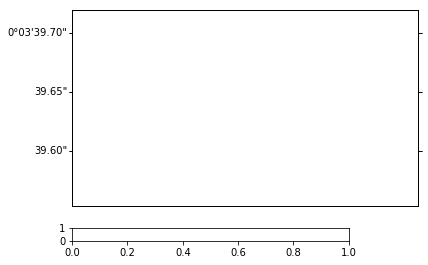

In [72]:
%matplotlib inline
ndc_cropped.plot()

## NDCube Inherited Attributed
As NDCube is inherited from astropy NDData, it includes the same attributes. These are:

### mask
An boolean array of the same same as the data array where True means that pixel is masked (e.g. because it's bad data) and False means unmasked (i.e. good data). Masked values can be ignored easily in calculations, e.g. of array mean, and are not included in the color table for plotting.
By default, all pixel values of -200 in IRISSpectrograph data are masked. But in our ndc NDCube, we did not define a mask on input so it is None.

In [137]:
sg.data["C II 1336"][0].mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [158]:
ndc.mask

### uncertainty
The uncertainty attribute can be an array the same size as the data, giving an uncertainty value for each pixel's DN. Or it can be a single value to apply to all pixels. Google "astropy nddata NDData" for more info.

### unit
Gives unit of data. Not defined when we initiated this NDCube is set to None here.

In [159]:
ndc.unit

**N.B.** When slicing/indexing an NDCube, all these additional attributes, mask, uncertainty, and even the WCS object are sliced in addition to the data. This is why it is so important to index the NDCube as a whole, and not just pull ou the data array.